In [1]:
# Import all of the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
lemur = cv2.imread('/content/IMG_0069.jpeg')  # Replace with your image path
lemur = cv2.cvtColor(lemur, cv2.COLOR_BGR2RGB)

In [3]:
# Get the image shape
rows, cols = lemur.shape[:2]

In [4]:
# Create a translation function
def translate_image(image, x_shift, y_shift):
  matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
  shifted_image = cv2.warpAffine(image, matrix, (cols, rows))
  return shifted_image

In [5]:
# Translate and store the image
at = translate_image(lemur, 75, 75)

In [6]:
# Create a rotation function
def rotate_image(image, angle, scale=1.0):
  center = (cols // 2, rows // 2)
  rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
  rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
  return rotated_image

In [7]:
# Rotate and store the image
ar = rotate_image(lemur, 55)

In [8]:
# Create a scale function
def scale_image(image, scale_factor):
  scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)
  return scaled_image

In [9]:
# Scale and store the image
asc = scale_image(lemur, 2.5)

In [10]:
# Create a shear function
def shear_image(image, shear_x, shear_y):
  matrix = np.float32([[1, shear_x, 0], [shear_y, 1, 0]])
  sheared_image = cv2.warpAffine(image, matrix, (cols, rows))
  return sheared_image

In [11]:
# Shear and store the image
ash = shear_image(lemur, 0.5, 0.5)

In [12]:
# Create an affline function
def affline_transform(image):
  src_points = np.float32([[50, 50], [200, 50], [50, 200]])
  dst_points = np.float32([[10, 100], [200, 50], [100, 250]])
  affine_matrix = cv2.getAffineTransform(src_points, dst_points)
  transformed_image = cv2.warpAffine(image, affine_matrix, (cols, rows))
  return transformed_image

In [13]:
# Affline and store the image
als = affline_transform(lemur)

In [14]:
# Create a list of titles and images
title = ['translate','rotate','scale','shear','affline']
images = [at,ar,asc,ash,als]

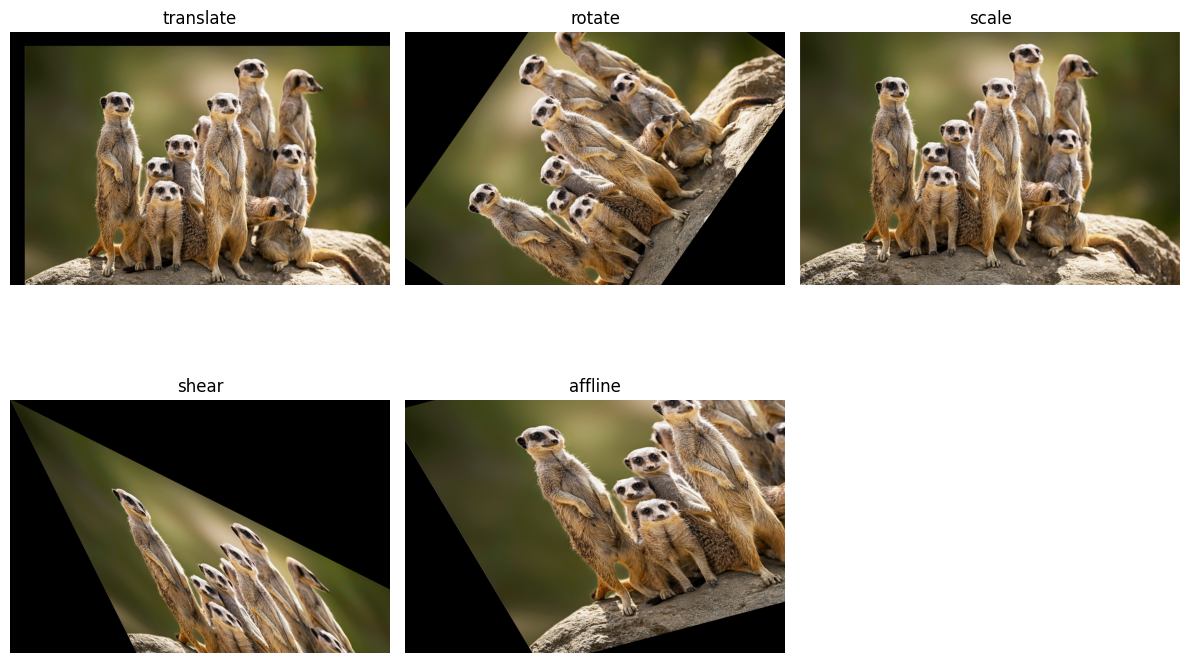

In [15]:
# Plot all of the images with geometric transformations
plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(title[i])
    plt.axis('off')

plt.tight_layout()
plt.show()